In [0]:
#imports for keras
%tensorflow_version 1.x
import keras
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [0]:
train_path = '/content/CroppedImagesLesionSeperated2/train'
test_path = '/content/CroppedImagesLesionSeperated2/test'
valid_path = '/content/CroppedImagesLesionSeperated2/valid'

In [31]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(450,450),classes=['actinic_keratosis','basal_cell_carcinoma','dermatofibroma','nevus','pigmented_benign_keratosis','vascular_lesion'],batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(450,450),classes=['actinic_keratosis','basal_cell_carcinoma','dermatofibroma','nevus','pigmented_benign_keratosis','vascular_lesion'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(450,450),classes=['actinic_keratosis','basal_cell_carcinoma','dermatofibroma','nevus','pigmented_benign_keratosis','vascular_lesion'],batch_size=10)

Found 774 images belonging to 6 classes.
Found 194 images belonging to 6 classes.
Found 242 images belonging to 6 classes.


In [0]:
imgs, labels = next(train_batches)

In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


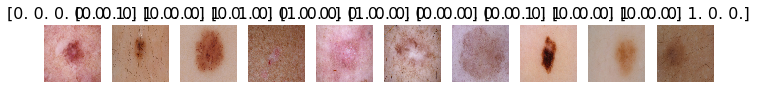

In [34]:
plots(imgs, titles=labels)

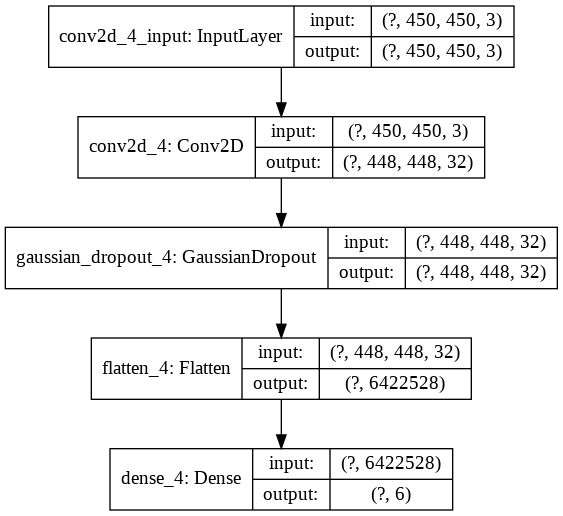

In [35]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(450,450,3)),
    keras.layers.GaussianDropout(.3),
    keras.layers.Flatten(),
    keras.layers.Dense(6,activation='softmax')
])
plot_model(cnn_model, show_shapes='True', show_layer_names='True', expand_nested='True')



In [0]:
cnn_model.compile(Adam(lr=.0001),loss='mean_squared_error', metrics=['accuracy'])

In [40]:
cnn_model.fit_generator(train_batches,steps_per_epoch=75,validation_data=valid_batches,validation_steps=20, epochs=50,verbose=1)

Epoch 1/50
75/75 [==============================] - 8s 105ms/step - loss: 0.3182 - acc: 0.0453 - val_loss: 0.3217 - val_acc: 0.0350
Epoch 2/50
75/75 [==============================] - 8s 108ms/step - loss: 0.3169 - acc: 0.0493 - val_loss: 0.3194 - val_acc: 0.0417
Epoch 3/50
75/75 [==============================] - 8s 109ms/step - loss: 0.3196 - acc: 0.0413 - val_loss: 0.3229 - val_acc: 0.0313
Epoch 4/50
75/75 [==============================] - 8s 105ms/step - loss: 0.3191 - acc: 0.0427 - val_loss: 0.3212 - val_acc: 0.0365
Epoch 5/50
75/75 [==============================] - 8s 105ms/step - loss: 0.3160 - acc: 0.0520 - val_loss: 0.3194 - val_acc: 0.0417
Epoch 6/50
75/75 [==============================] - 8s 103ms/step - loss: 0.3178 - acc: 0.0467 - val_loss: 0.3217 - val_acc: 0.0350
Epoch 7/50
75/75 [==============================] - 8s 107ms/step - loss: 0.3191 - acc: 0.0427 - val_loss: 0.3212 - val_acc: 0.0365
Epoch 8/50
75/75 [==============================] - 8s 109ms/step - loss: 0.

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


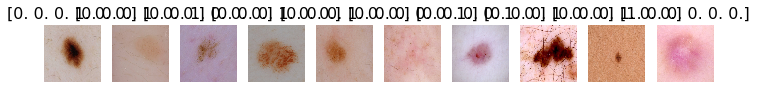

In [23]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [24]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [25]:
predictions = cnn_model.predict_generator(test_batches,steps=5,verbose=1)

5/5 [==============================] - 0s 80ms/step
